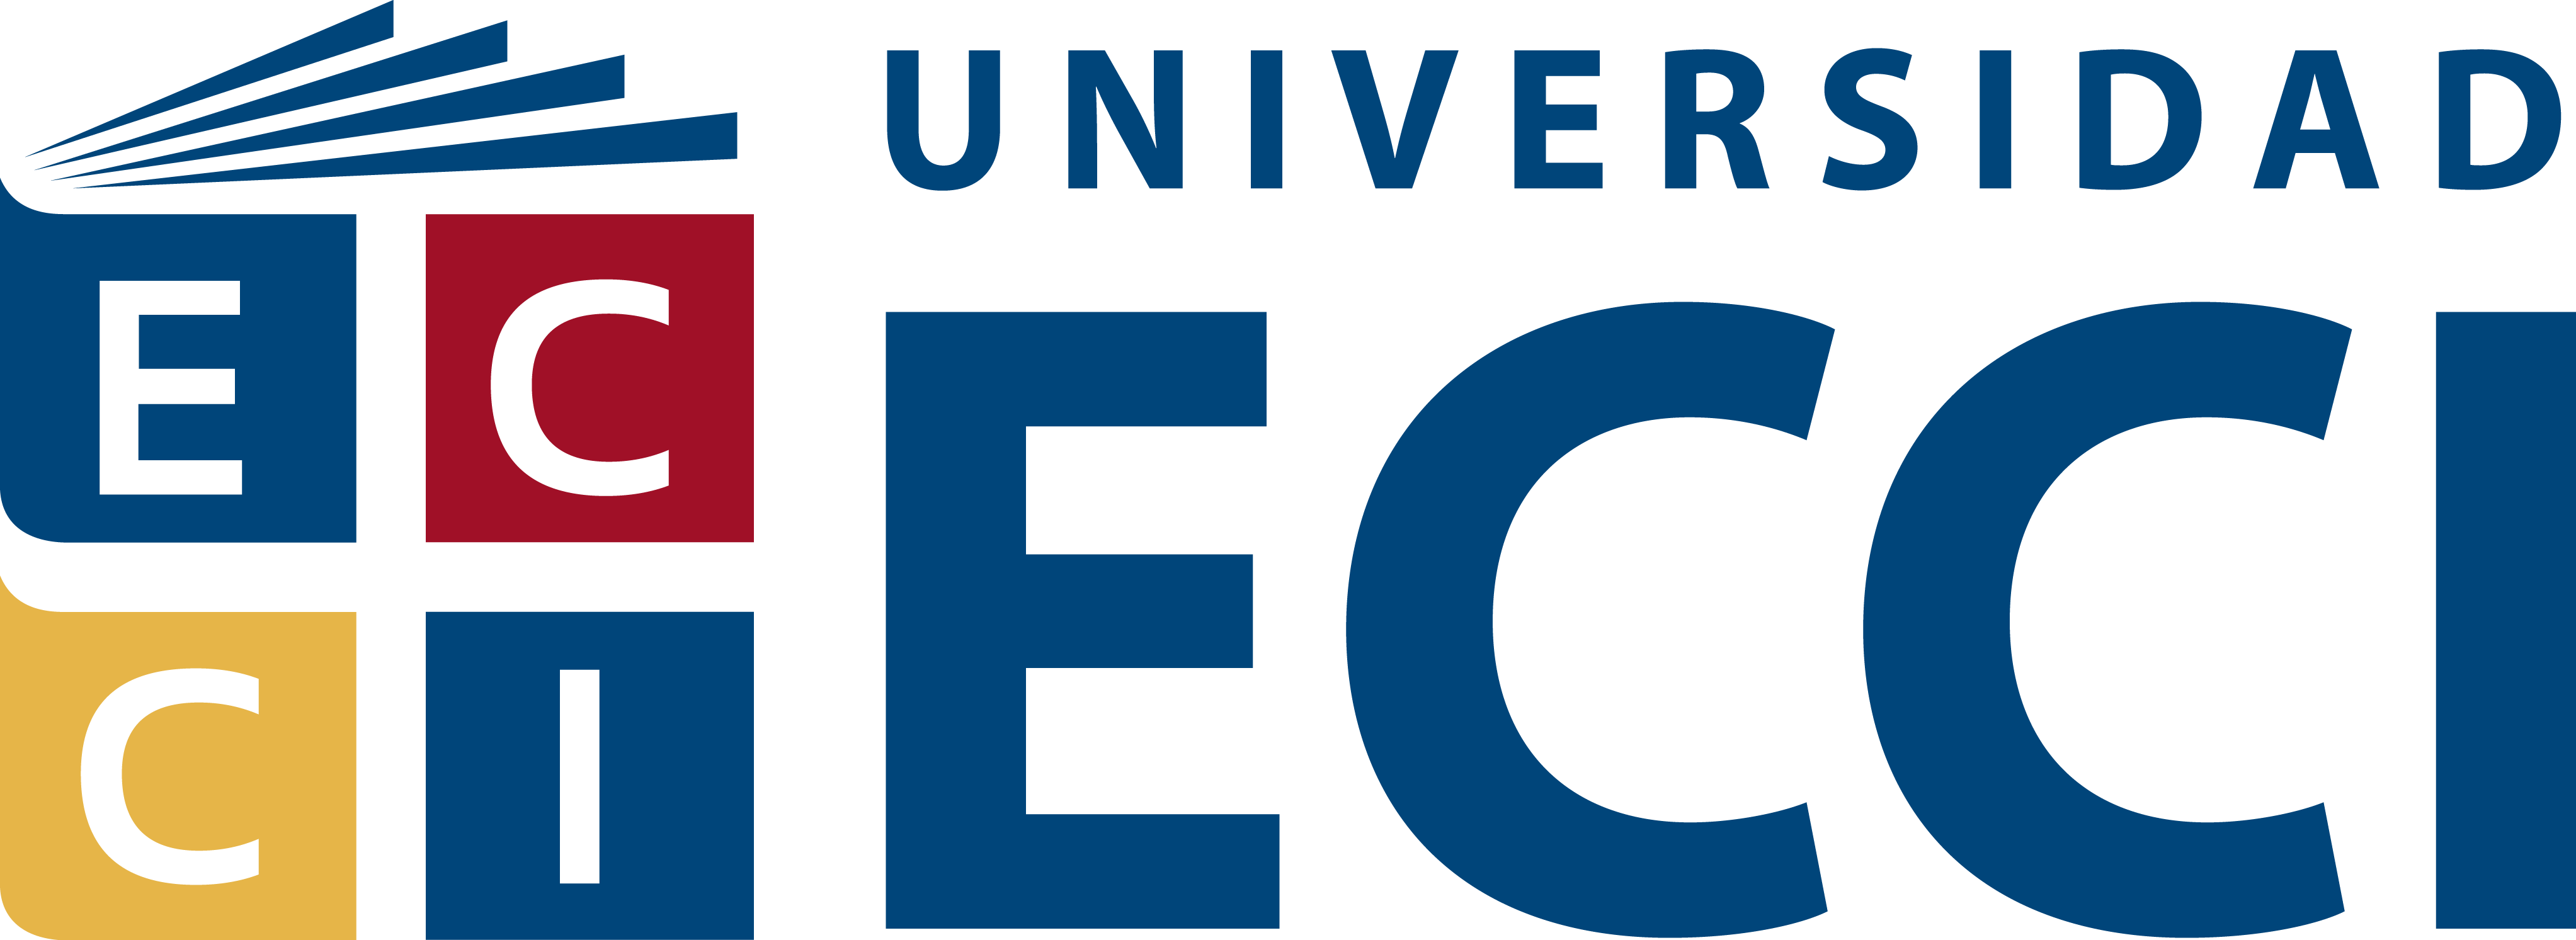

# Pandas vs Polars vs Spark vs Dask
[Author: Kevin Steven Olivera caicedo](https://github.com/KevinO26?tab=repositories)

Inspired in: https://www.youtube.com/watch?v=mi9f9zOaqM8

Original data: Kaggle

This jupyter notebook is designed to study and compare different tools to read and manipulate data; to be used in the data undertanding phase. The corresponding explanations will be given directly in class, therefore the material isn't autoexplained. Don´t forget ask me for the access to the data. And, please, give credits to the original author's idea and, if consider, also to me.

_Updated: June 20th, 2023_

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Playing with pandas

In [1]:
import pandas as pd
# flights_file1 = "/content/drive/MyDrive/Seminario profesional - BigData/Laboratorio 2 - (Taller 2)/Pruebas/flights/Combined_Flights_2018.parquet"
flights_file2 = "/content/drive/MyDrive/Seminario profesional - BigData/Laboratorio 2 - (Taller 2)/Pruebas/flights/Combined_Flights_2019.parquet"
# flights_fille3 = "/content/drive/MyDrive/Seminario profesional - BigData/Laboratorio 2 - (Taller 2)/Pruebas/flights/Combined_Flights_2020.parquet"
# flights_file4 = "/content/drive/MyDrive/Seminario profesional - BigData/Laboratorio 2 - (Taller 2)/Pruebas/flights/Combined_Flights_2021.parquet"
flights_file5 = "/content/drive/MyDrive/Seminario profesional - BigData/Laboratorio 2 - (Taller 2)/Pruebas/flights/Combined_Flights_2022.parquet"
# df1 = pd.read_parquet(flights_file1)
df2 = pd.read_parquet(flights_file2)
# df3 = pd.read_parquet(flights_file3)
# df4 = pd.read_parquet(flights_file4)
df5 = pd.read_parquet(flights_file5)

In [9]:
df = pd.concat([df2])
# df = df2

In [ ]:
%%timeit

df_agg = df.groupby(['Airline','Year'])[["DepDelayMinutes", "ArrDelayMinutes"]].agg(
    ["mean", "sum", "max"]
)
df_agg = df_agg.reset_index()
df_agg.to_parquet("temp_pandas.parquet")

In [ ]:
!ls -GFlash temp_pandas.parquet

In [ ]:
pd.read_parquet('temp_pandas.parquet')

In [ ]:
pd.read_parquet('temp_pandas.parquet').info()

## Playing with Polars

In [ ]:
import polars as pl

In [ ]:
flights_file1 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2018.parquet"
flights_file2 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2019.parquet"
flights_file3 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2020.parquet"
flights_file4 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2021.parquet"
flights_file5 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2022.parquet"
df1 = pl.scan_parquet(flights_file1)
df2 = pl.scan_parquet(flights_file2)
df3 = pl.scan_parquet(flights_file3)
df4 = pl.scan_parquet(flights_file4)
df5 = pl.scan_parquet(flights_file5)

In [ ]:
 #%%timeit

df_polars = (
    pl.concat([df1, df2, df3, df4, df5])
    .group_by(['Airline', 'Year'])
    .agg([
        pl.col("DepDelayMinutes").mean().alias("avg_dep_delay"),
        pl.col("DepDelayMinutes").sum().alias("sum_dep_delay"),
        pl.col("DepDelayMinutes").max().alias("max_dep_delay"),
        pl.col("ArrDelayMinutes").mean().alias("avg_arr_delay"),
        pl.col("ArrDelayMinutes").sum().alias("sum_arr_delay"),
        pl.col("ArrDelayMinutes").max().alias("max_arr_delay"),
      ])
).collect()

df_polars.write_parquet('temp_polars.parquet')

In [ ]:
!ls -GFlash temp_polars.parquet

## Playing with PySpark

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, max, sum, concat

In [ ]:
spark = SparkSession.builder.master("local[1]").appName("airline-example").getOrCreate()

In [ ]:
flights_file1 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2018.parquet"
flights_file2 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2019.parquet"
flights_file3 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2020.parquet"
flights_file4 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2021.parquet"
flights_file5 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2022.parquet"

In [ ]:
df_spark1 = spark.read.parquet(flights_file1)
df_spark2 = spark.read.parquet(flights_file2)
df_spark3 = spark.read.parquet(flights_file3)
df_spark4 = spark.read.parquet(flights_file4)
df_spark5 = spark.read.parquet(flights_file5)

In [ ]:
df_spark = df_spark1.union(df_spark2)
df_spark = df_spark.union(df_spark3)
df_spark = df_spark.union(df_spark4)
df_spark = df_spark.union(df_spark5)

In [ ]:
# %%timeit

df_spark_agg = df_spark.groupby("Airline", "Year").agg(
    avg("ArrDelayMinutes").alias('avg_arr_delay'),
    sum("ArrDelayMinutes").alias('sum_arr_delay'),
    max("ArrDelayMinutes").alias('max_arr_delay'),
    avg("DepDelayMinutes").alias('avg_dep_delay'),
    sum("DepDelayMinutes").alias('sum_dep_delay'),
    max("DepDelayMinutes").alias('max_dep_delay'),
)
df_spark_agg.write.mode('overwrite').parquet('temp_spark.parquet')

In [ ]:
!ls -GFlash temp_pyspark.parquet

## Playing with dask

In [ ]:
import pandas as pd
import dask.dataframe as dd
# flights_file1 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2018.parquet"
flights_file2 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2019.parquet"
flights_file3 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2020.parquet"
flights_file4 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2021.parquet"
flights_file5 = "/content/drive/MyDrive/bigData/flights/Combined_Flights_2022.parquet"
# df1 = dd.read_parquet(flights_file1)
df2 = dd.read_parquet(flights_file2)
df3 = dd.read_parquet(flights_file3)
df4 = dd.read_parquet(flights_file4)
df5 = dd.read_parquet(flights_file5)

In [ ]:
df = dd.concat([df2, df3, df4, df5])

In [ ]:
print(df.compute())

In [ ]:
df = df.compute()

In [ ]:
%%timeit

df_agg = df.groupby(['Airline','Year'])[["DepDelayMinutes", "ArrDelayMinutes"]].agg(
    ["mean", "sum", "max"]
)
df_agg = df_agg.reset_index()
df_agg.to_parquet("temp_dask.parquet")

In [ ]:
!ls -GFlash temp_pandas.parquet

In [ ]:
pd.read_parquet('temp_dask.parquet').info()

In [ ]:
pd.read_parquet('temp_dask.parquet')

## Read Results

In [ ]:
import pandas as pd

In [ ]:
agg_pandas = pd.read_parquet('temp_pandas.parquet')
agg_polars = pd.read_parquet('temp_polars.parquet')
agg_spark = pd.read_parquet('temp_spark.parquet')
agg_dask = pd.read_parquet('temp_dask.parquet')

In [ ]:
agg_pandas.shape, agg_polars.shape, agg_spark.shape, agg_dask.shape

In [ ]:
agg_pandas.sort_values(['Airline','Year']).head()

In [ ]:
agg_polars.sort_values(['Airline','Year']).head()

In [ ]:
agg_spark.sort_values(['Airline','Year']).head()

In [ ]:
agg_dask.sort_values(['Airline','Year']).head()